 THE PURPOSE OF THIS PROJECT IS TO TRY AND PREDICT CUSTOMER BEHAVIOUR BASED ON VARIOUS FACTORS SUCH AS CREDIT CARD POSSESION,AGE 
GEOGRAPHY AMONG OTHERS . For any business knowing what drives the sales to customers is very key in implementation of business
decisions such as sales and marketing 

In [169]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
from torch import nn
import torch.nn.functional as F


In [170]:
df  = pd.read_csv("C:\\Datasets\\Churn_for_customers\\Churn_Modelling.csv")

In [171]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [172]:
df.shape

(10000, 14)

In [173]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [174]:
# determing continous and categorical variables
for column in df.columns:
    print(f"The total datapoints in {column} are {df[column].nunique()}")

The total datapoints in RowNumber are 10000
The total datapoints in CustomerId are 10000
The total datapoints in Surname are 2932
The total datapoints in CreditScore are 460
The total datapoints in Geography are 3
The total datapoints in Gender are 2
The total datapoints in Age are 70
The total datapoints in Tenure are 11
The total datapoints in Balance are 6382
The total datapoints in NumOfProducts are 4
The total datapoints in HasCrCard are 2
The total datapoints in IsActiveMember are 2
The total datapoints in EstimatedSalary are 9999
The total datapoints in Exited are 2


In [175]:
# The categorical features include [Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited]
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [176]:
# General statistical info
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [177]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [178]:
# Common surname ?
df['Surname'].value_counts().head(10)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Name: Surname, dtype: int64

In [179]:
df['Geography'].value_counts().head(10)
# This bank has a good number of customers from France

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [180]:
df.drop(['Surname'],axis=1,inplace=True)

In [181]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

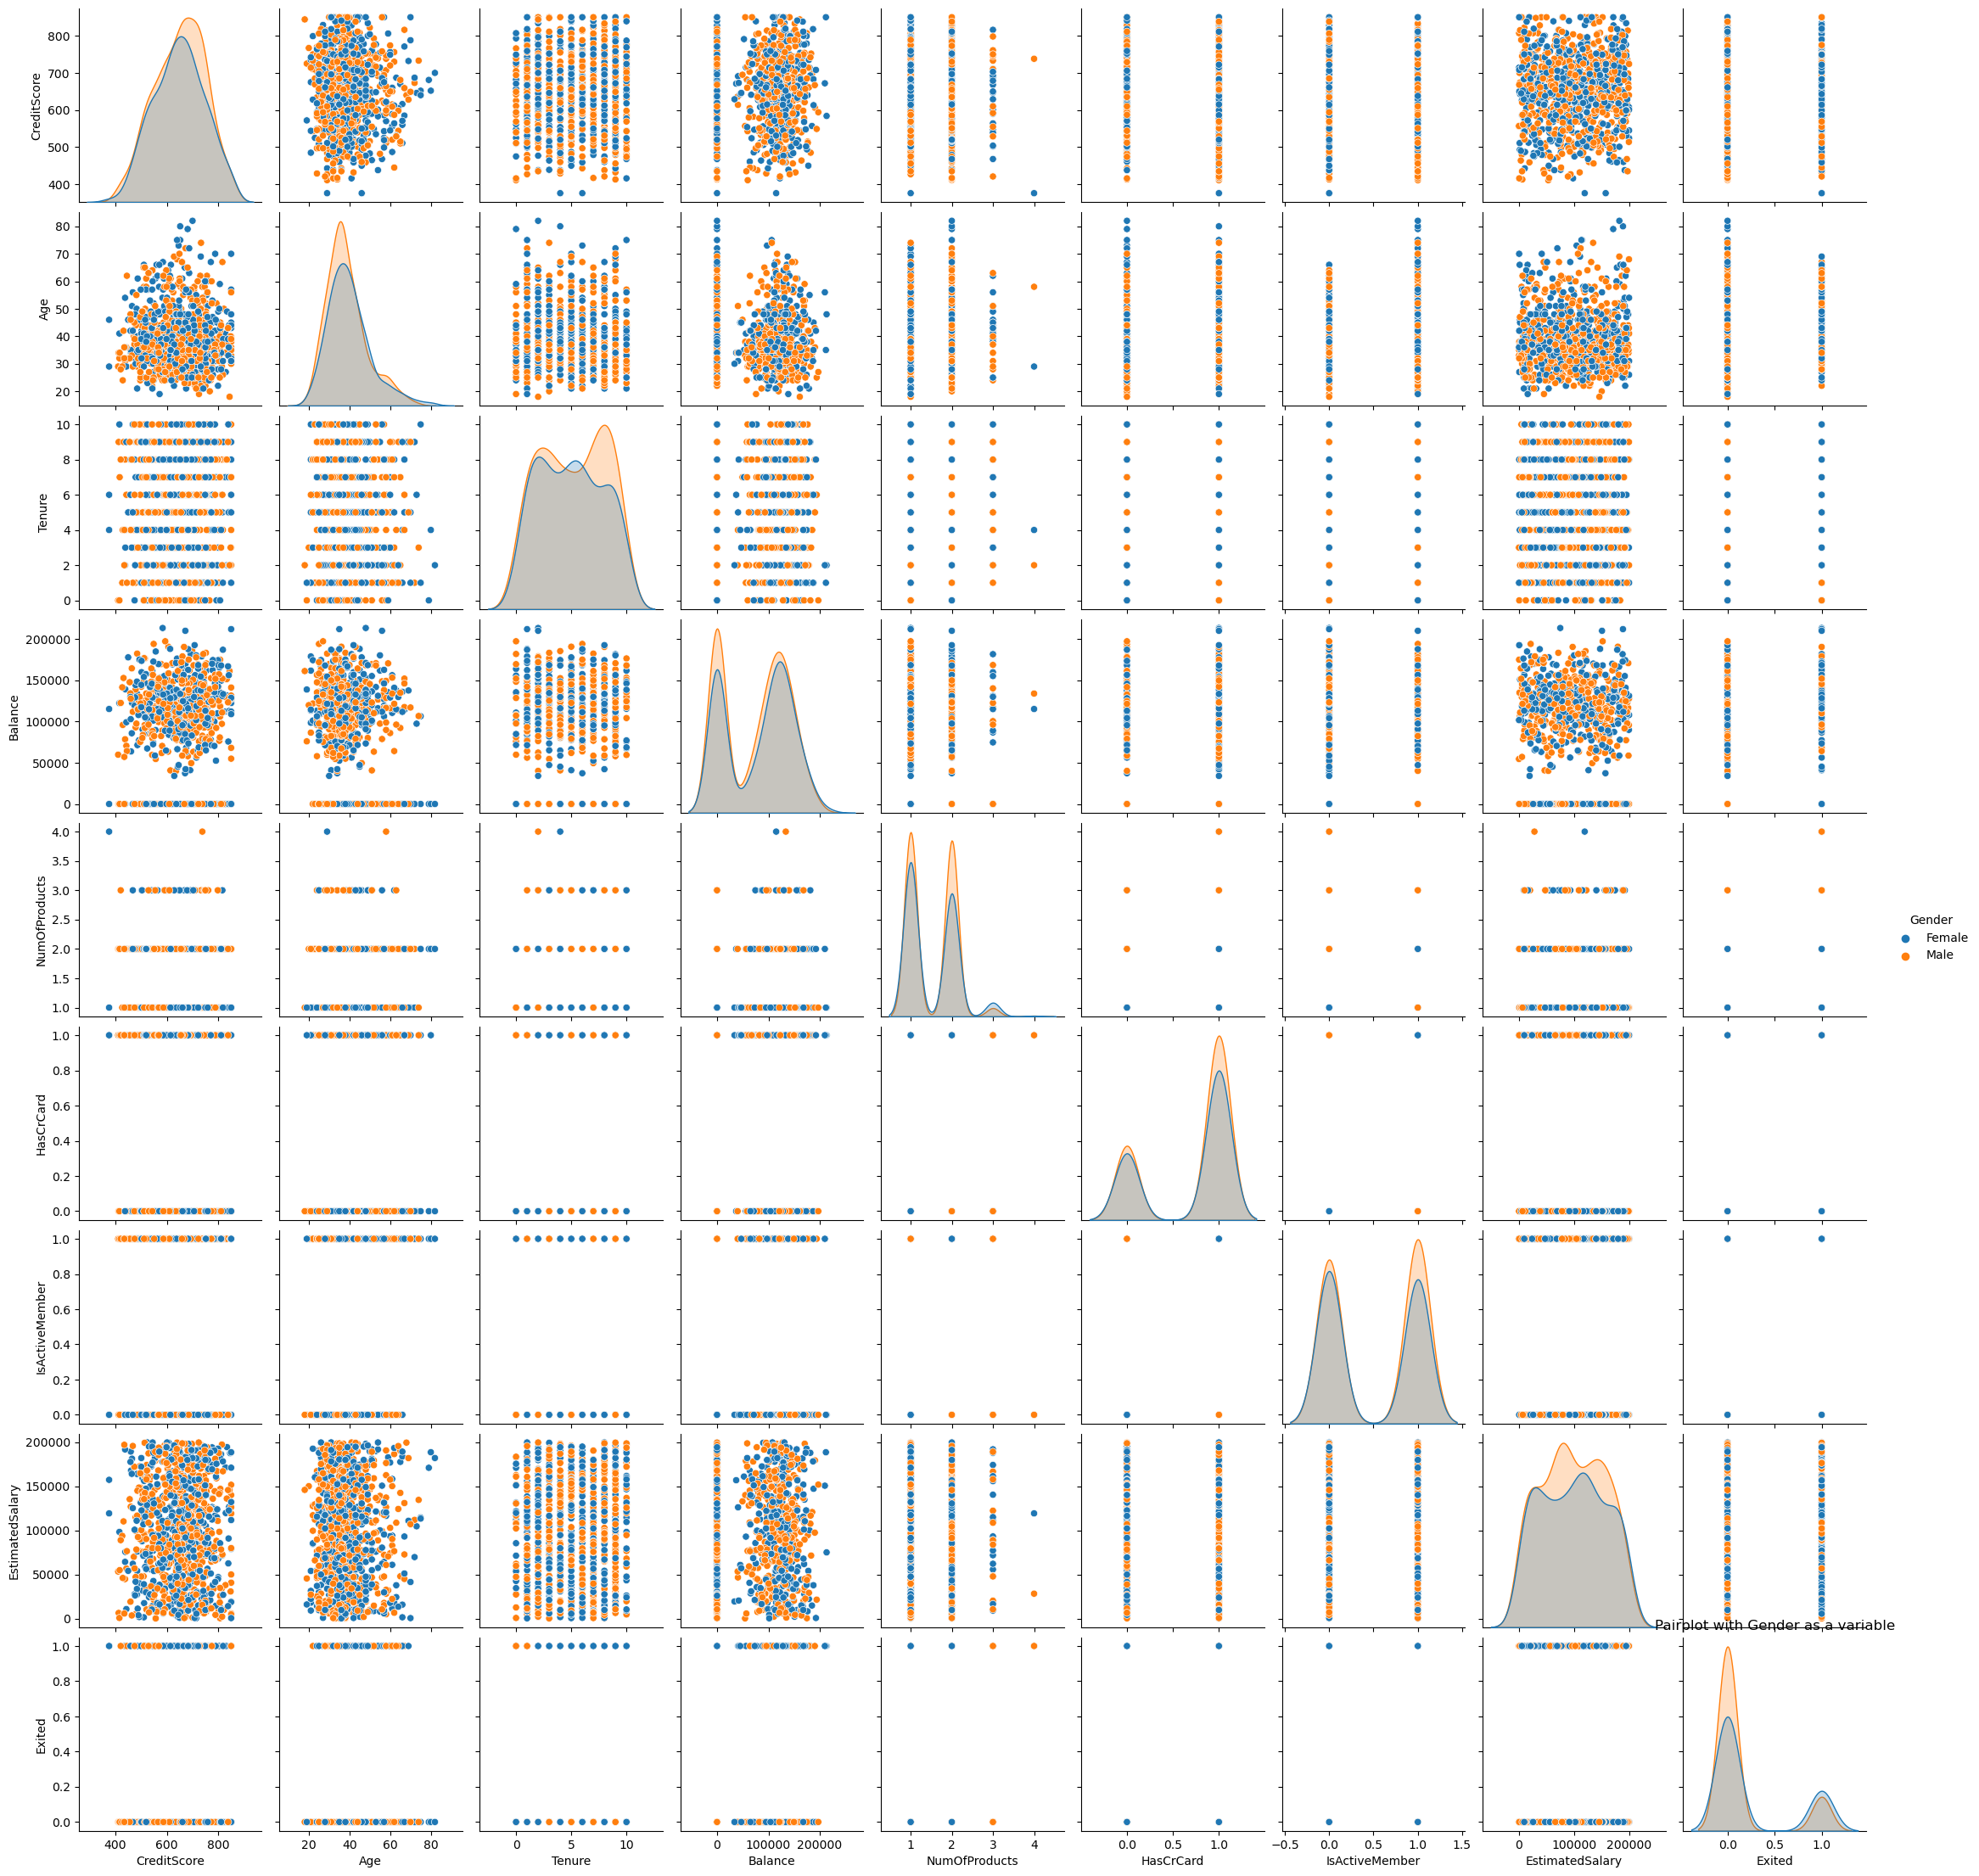

In [182]:
sns.pairplot(df.head(1000),hue='Gender')
plt.title('Pairplot with Gender as a variable')
plt.show()

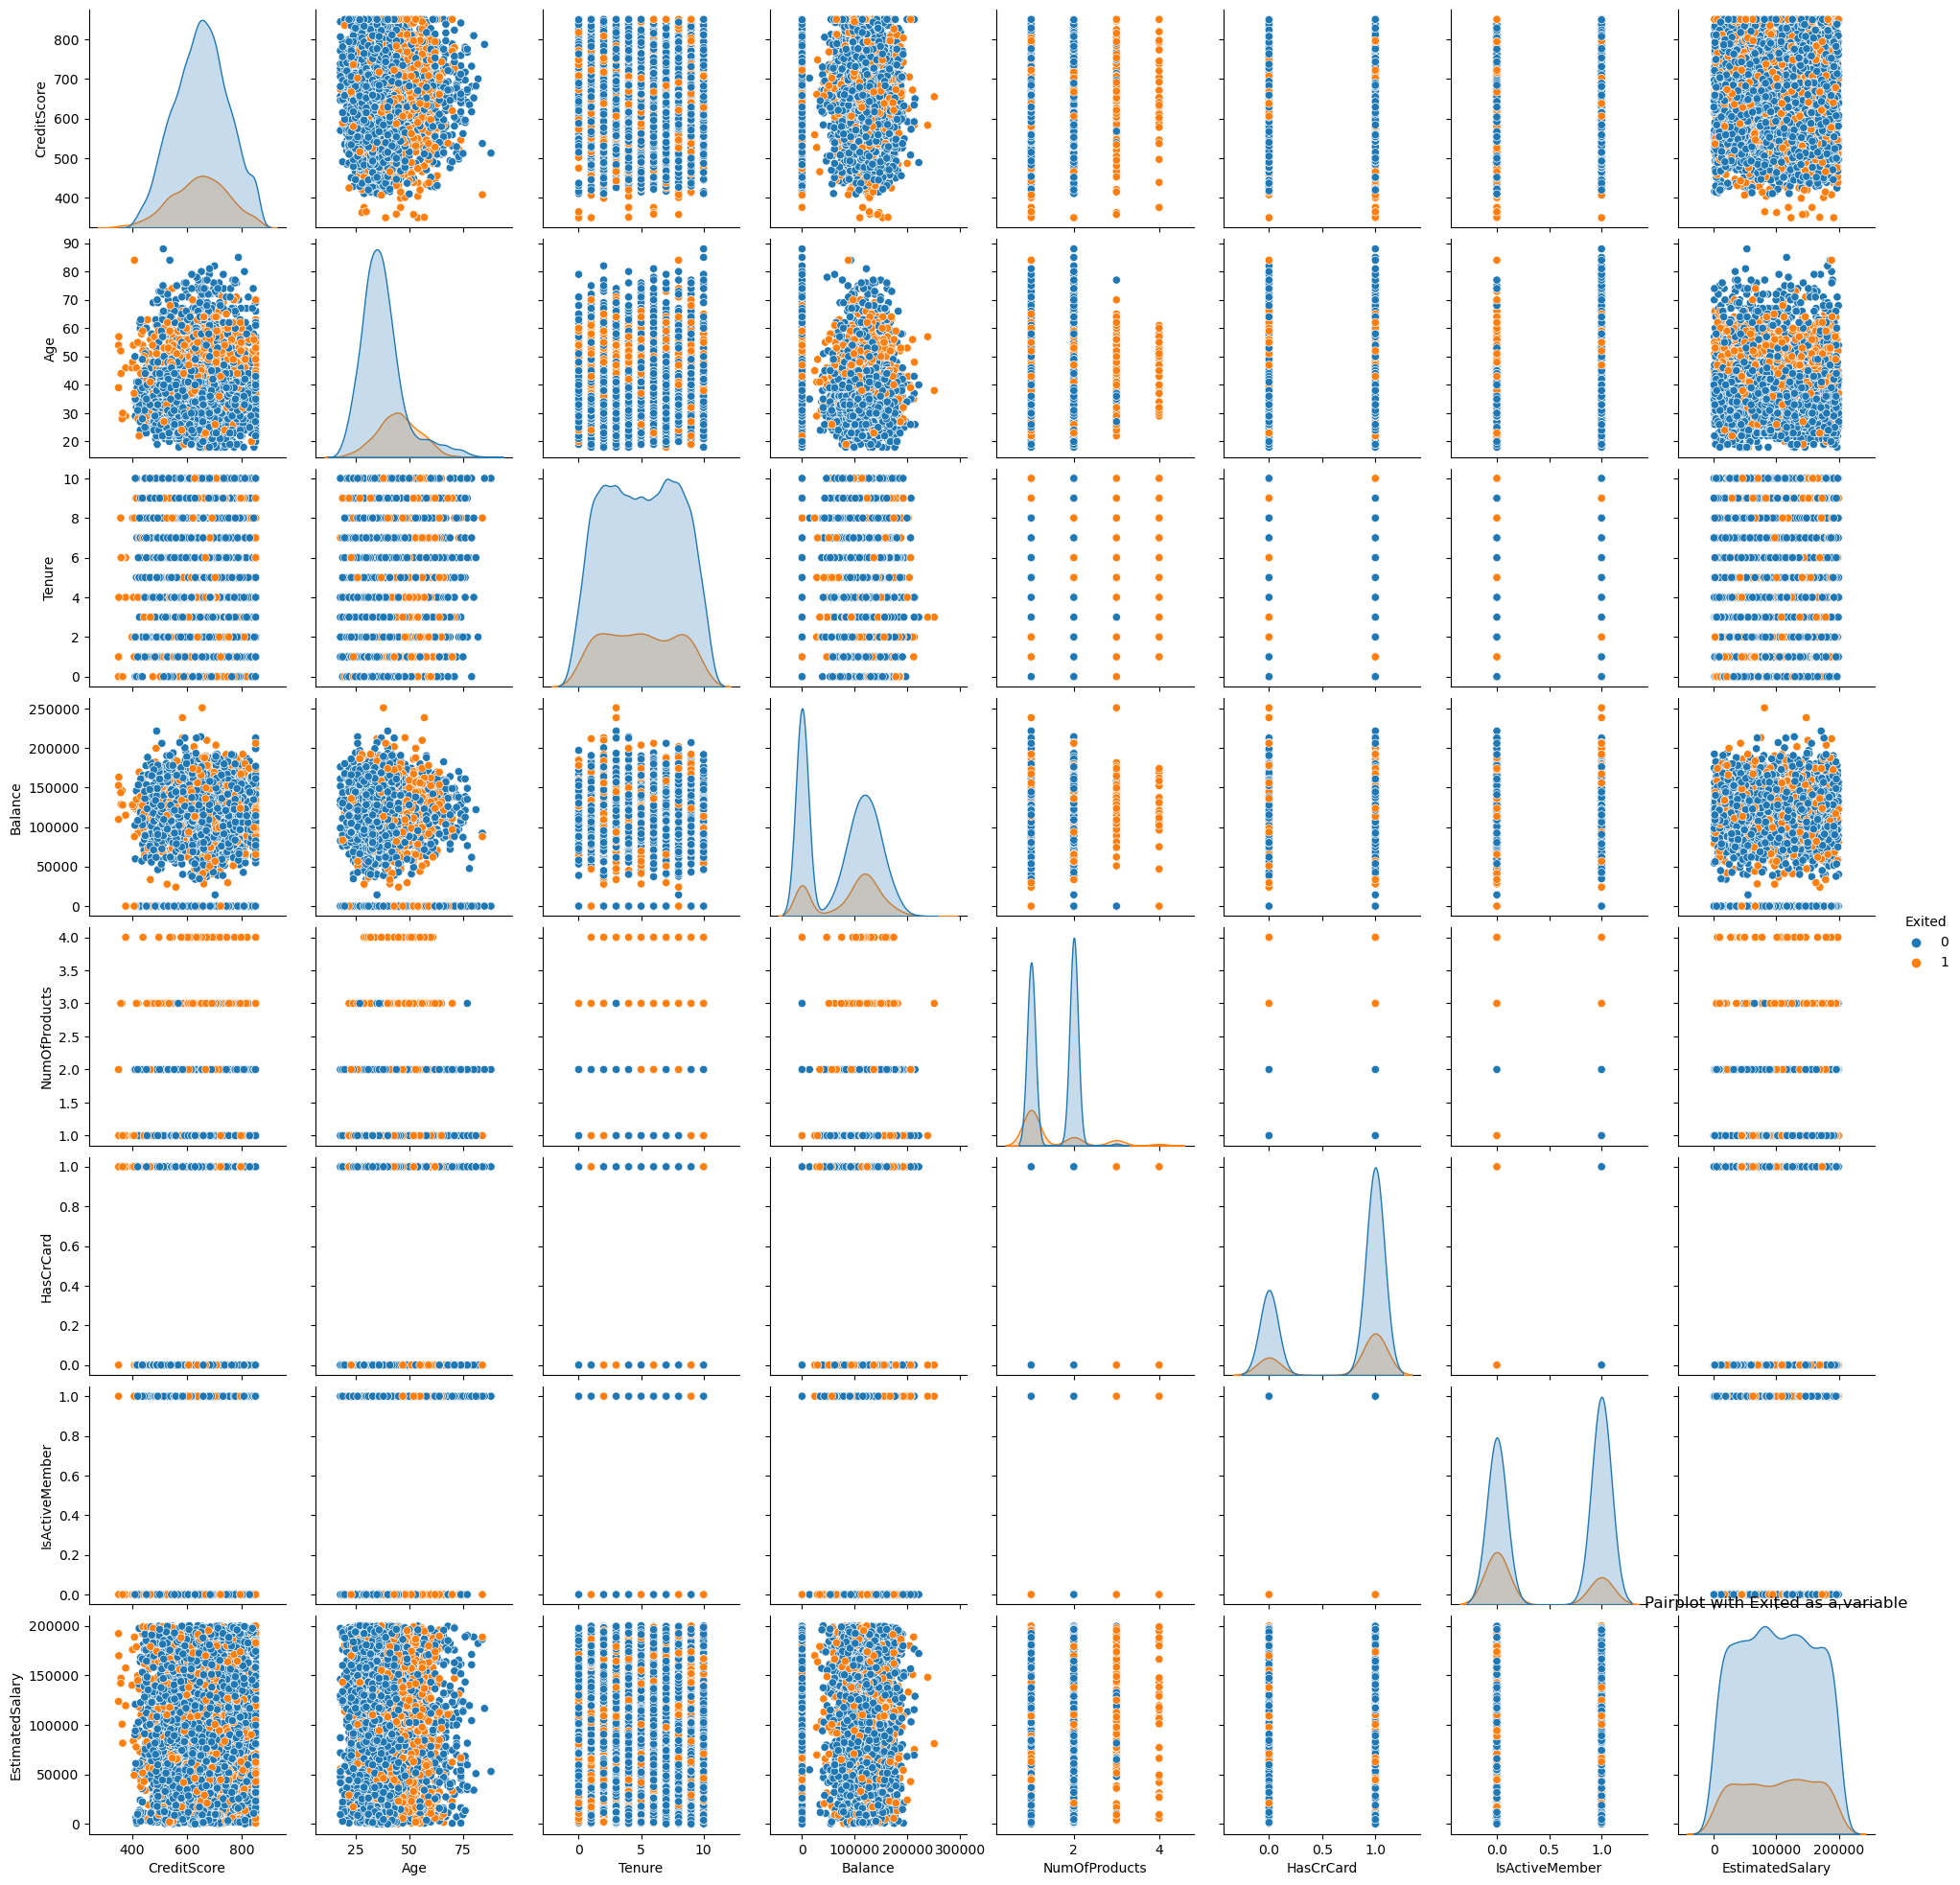

In [183]:
sns.pairplot(df.head(5000),hue='Exited')
plt.title('Pairplot with Exited as a variable')
plt.show()

In [184]:
# Correlation,what variable have a relationship?
correlation = df.corr()
correlation

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

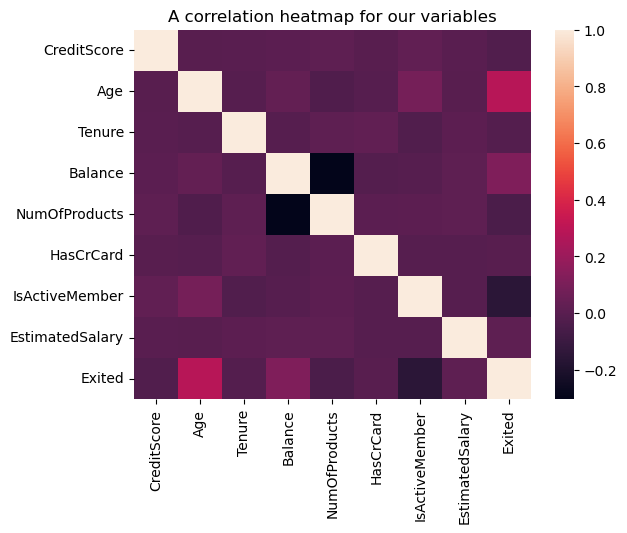

In [185]:
sns.heatmap(correlation)
plt.title("A correlation heatmap for our variables")
plt.show()

# EXPLORATORY DATA ANALYSIS

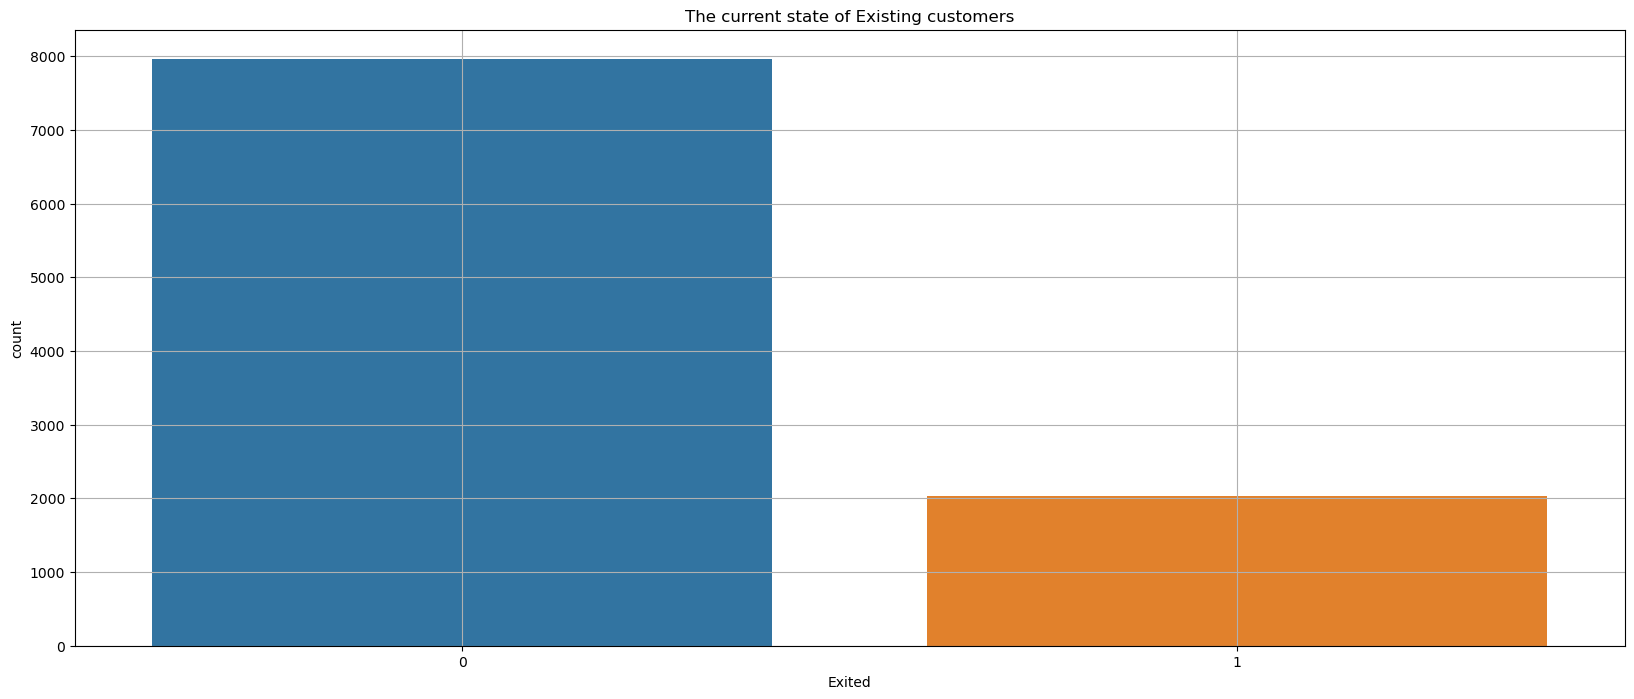

In [186]:
# How many have currently exited?
plt.figure(figsize=(20,8))
sns.countplot(x= df['Exited'])
plt.title('The current state of Existing customers')
plt.grid()
plt.show()
# From the look  of things a lot of customers have been retained but that does not mean that we dont need to account for the exited

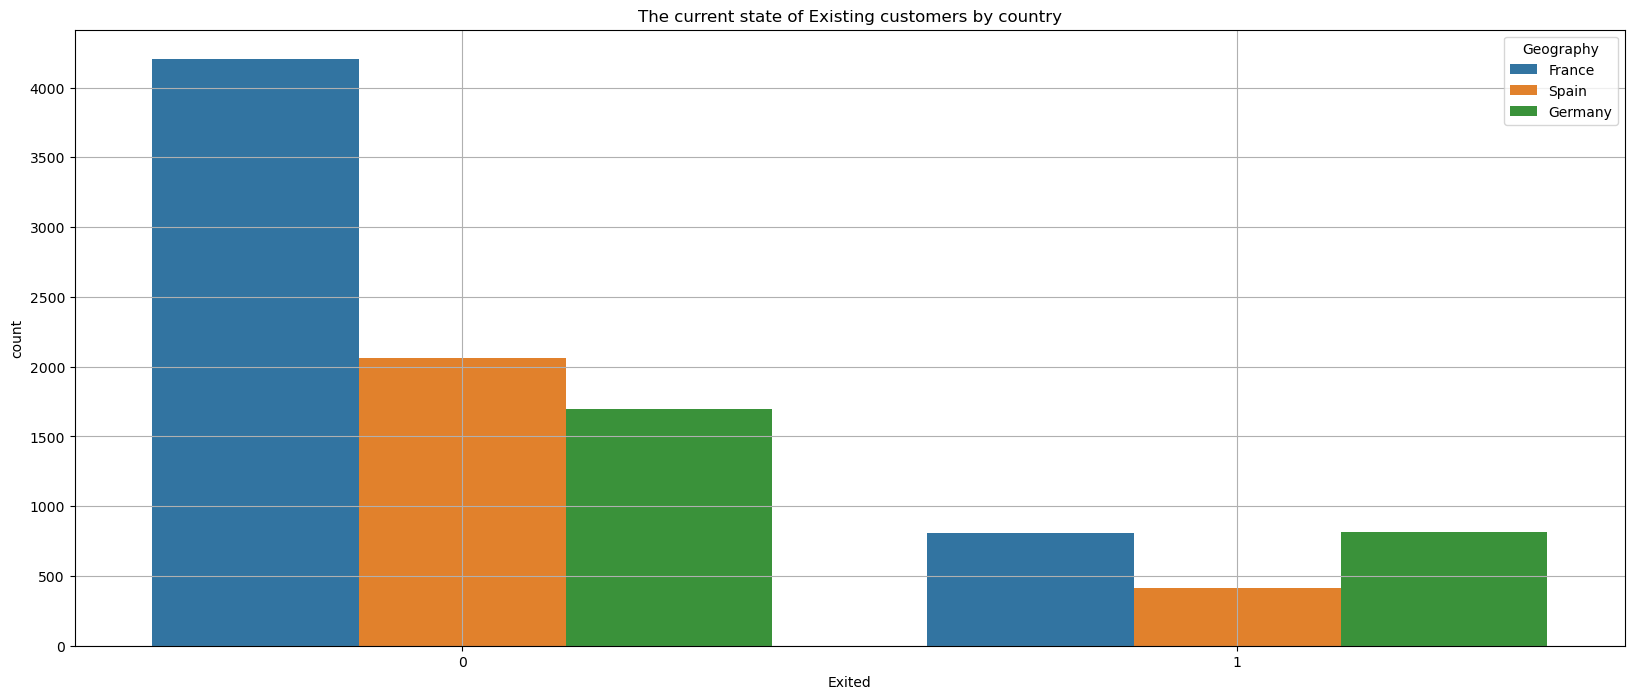

In [187]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'Exited',hue='Geography',data=df)
plt.title('The current state of Existing customers by country')
plt.grid()
plt.show()
# SPAIN has the least number of customers exiting the bank

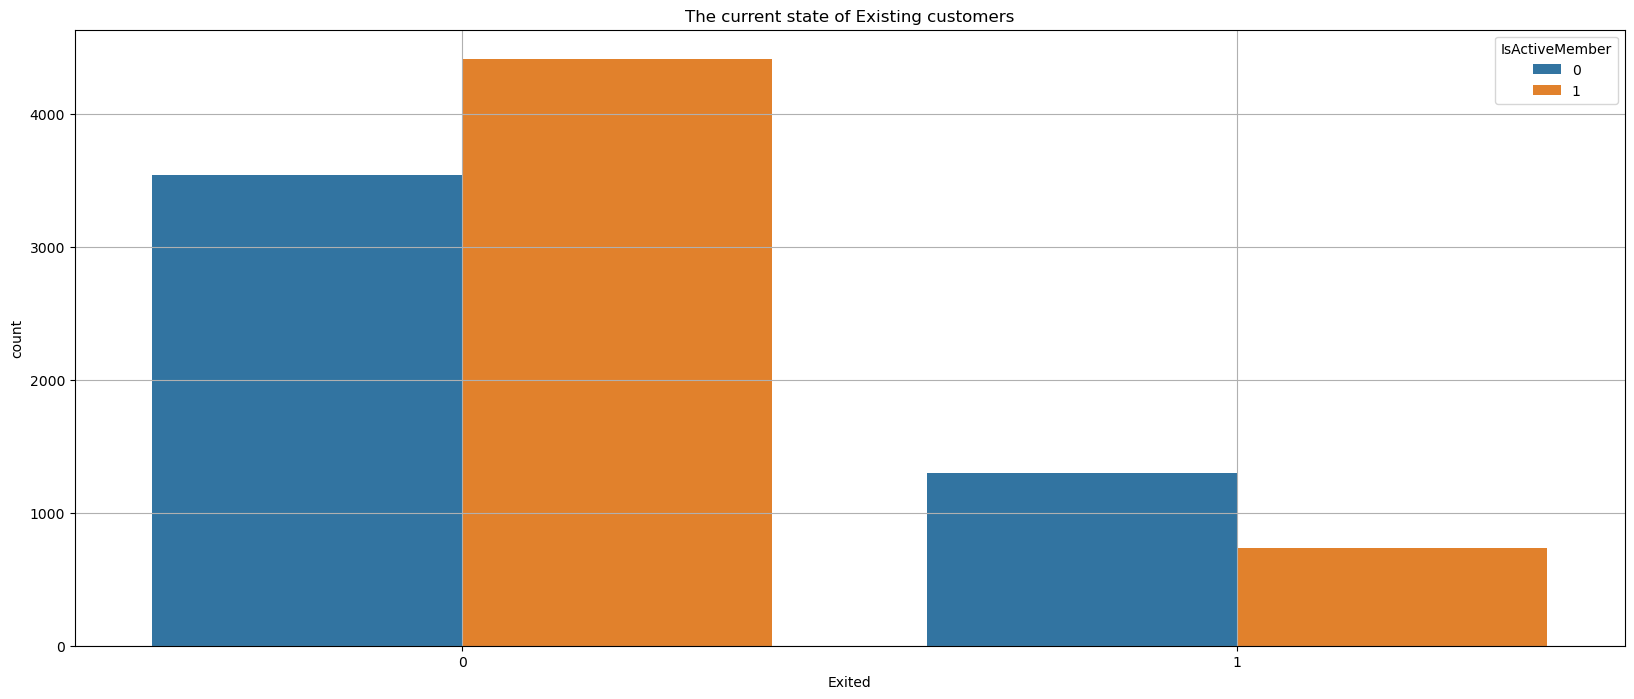

In [188]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'Exited',hue='IsActiveMember',data=df)
plt.title('The current state of Existing customers')
plt.grid()
plt.show()

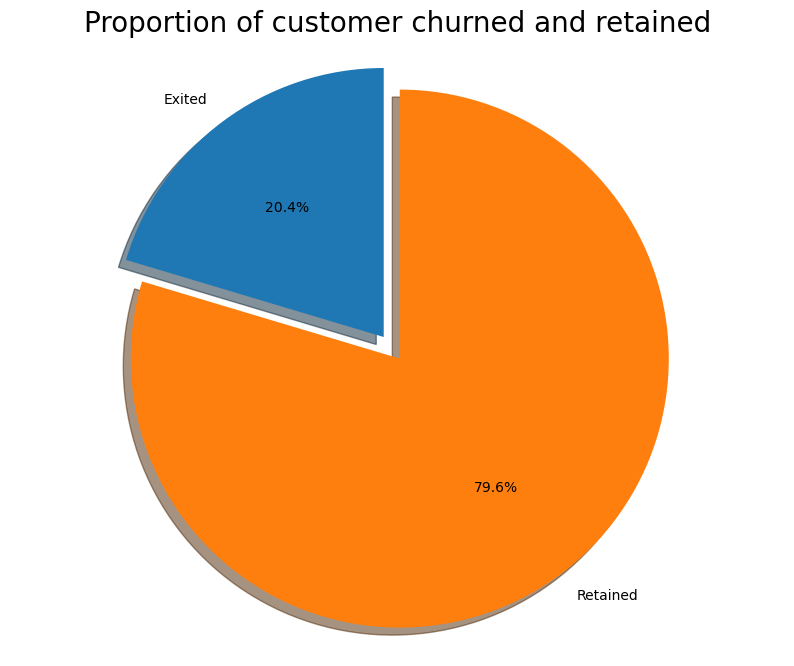

In [189]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()
#From the pie chart it is clear that the bank has retained a majority of its clients .But for how long?

REVIEW OF STATUS WITH RESPECT TO SOME CATEGORICAL VARIABLES

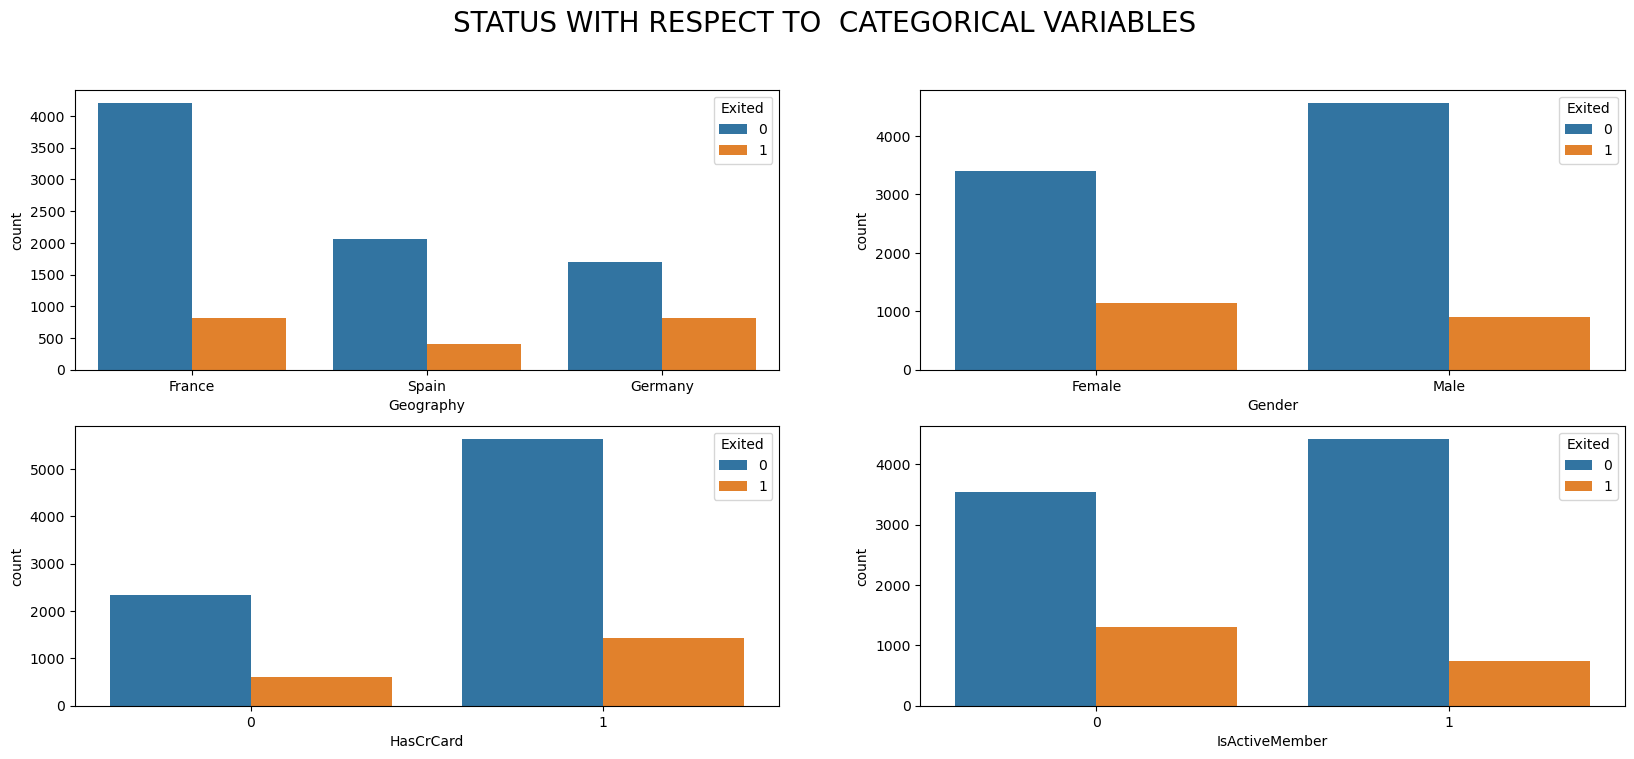

In [190]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('STATUS WITH RESPECT TO  CATEGORICAL VARIABLES',size=20)
plt.subplot(2,2,1)
sns.countplot(x='Geography',hue='Exited',data=df)
plt.subplot(2,2,2)
sns.countplot(x='Gender',hue='Exited',data=df)
plt.subplot(2,2,3)
sns.countplot(x='HasCrCard',hue='Exited',data=df)
plt.subplot(2,2,4)
sns.countplot(x='IsActiveMember',hue='Exited',data=df)
plt.show()

STATUS IN RELATION WITH CONTINOUS VARIABLES 

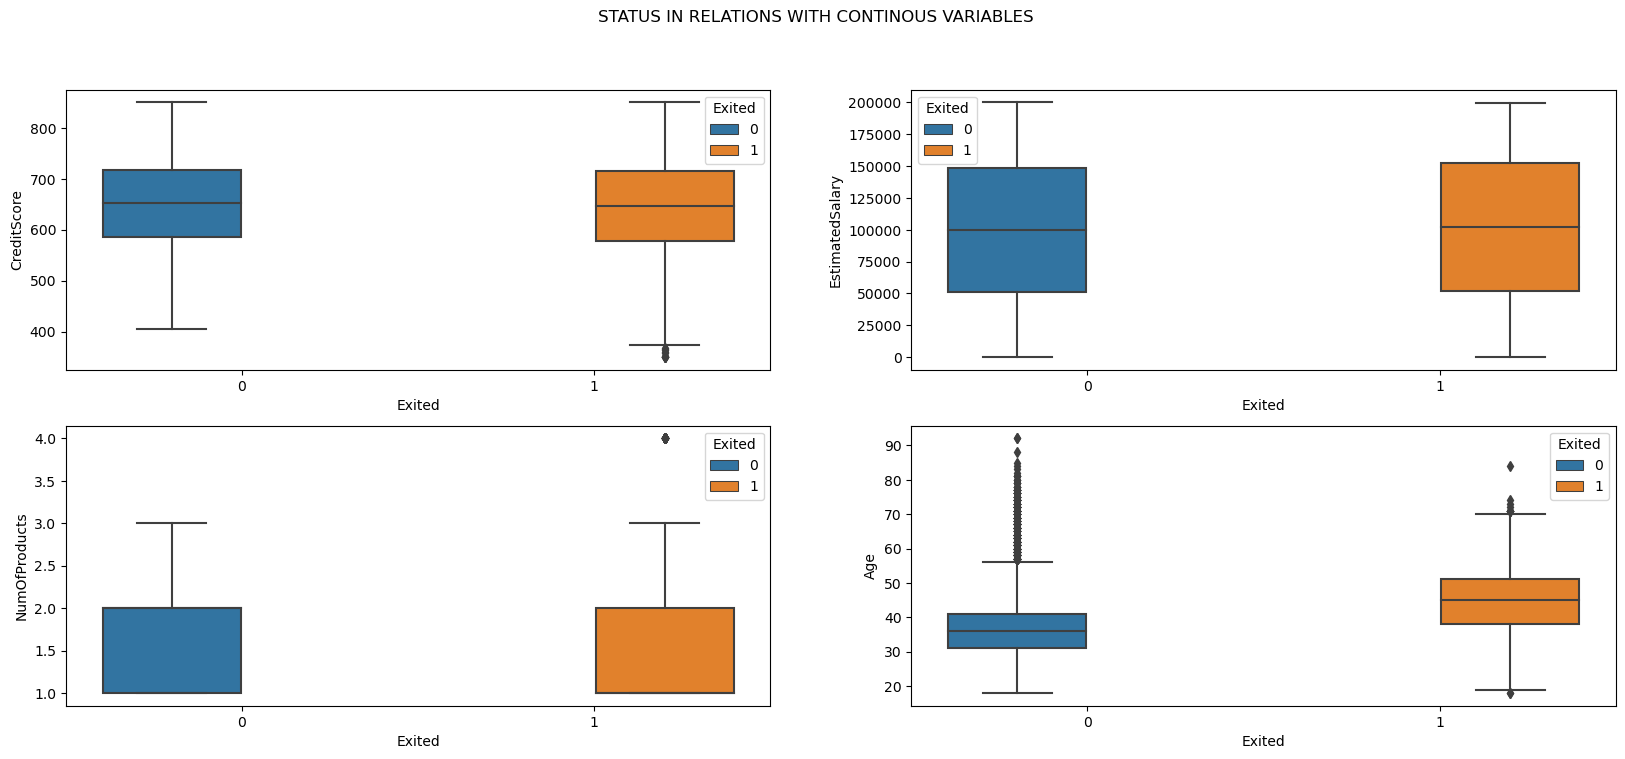

In [191]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('STATUS IN RELATIONS WITH CONTINOUS VARIABLES')
plt.subplot(2,2,1)
sns.boxplot(x='Exited',y='CreditScore',data=df,hue='Exited')
plt.subplot(2,2,2)
sns.boxplot(x='Exited',y='EstimatedSalary',data=df,hue='Exited')
plt.subplot(2,2,3)
sns.boxplot(x='Exited',y='NumOfProducts',data=df,hue='Exited')
plt.subplot(2,2,4)
sns.boxplot(x='Exited',y='Age',data=df,hue='Exited')
plt.show()

In [192]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<Figure size 2000x800 with 0 Axes>

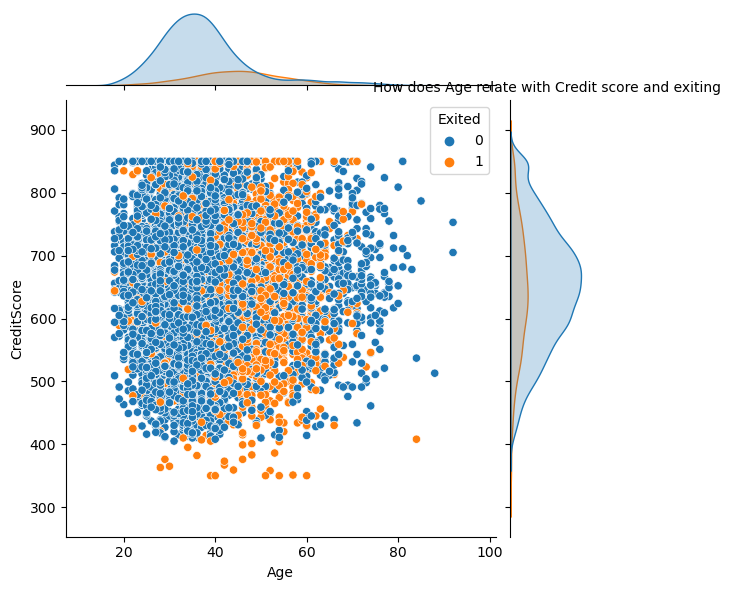

In [193]:
# Age how does it compare with the credit score
fig=plt.figure(figsize=(20,8))
sns.jointplot(x='Age',y='CreditScore',hue='Exited',data=df)
plt.title('How does Age relate with Credit score and exiting',size=10)
plt.show()
# The bank is losing a lot customers aged between 40 and 60 years ,55 years 

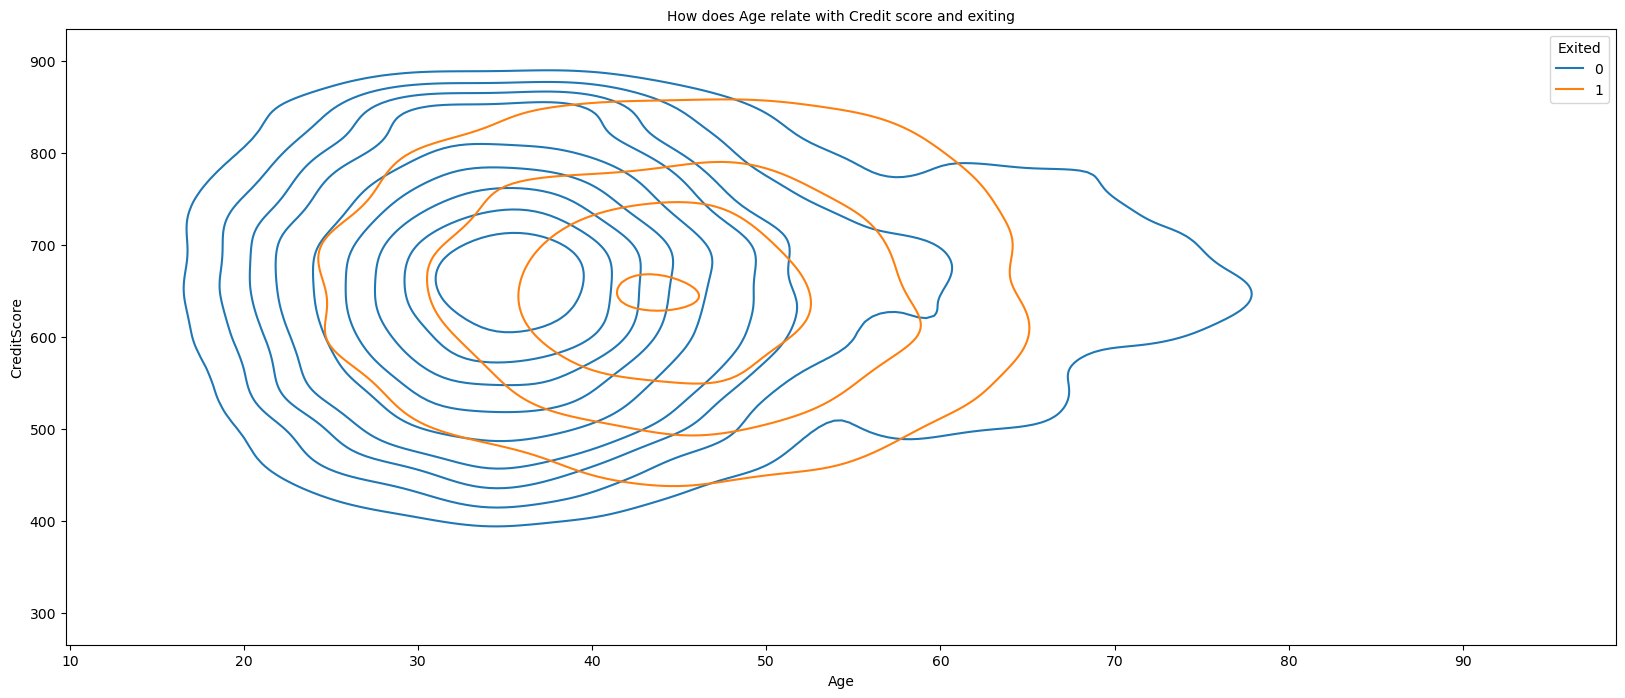

In [194]:
fig=plt.figure(figsize=(20,8))
sns.kdeplot(x='Age',y='CreditScore',hue='Exited',data=df)
plt.title('How does Age relate with Credit score and exiting',size=10)
plt.show()
# A Credit score of 650 achieved by an age of 35-49 is prevalent .

In [195]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Figure size 2000x800 with 0 Axes>

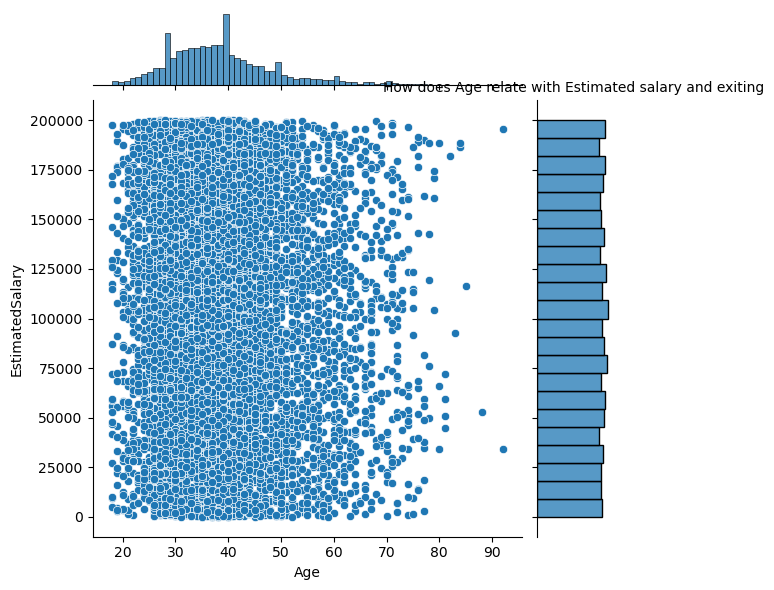

In [196]:
fig=plt.figure(figsize=(20,8))
sns.jointplot(x='Age',y='EstimatedSalary',data=df)
plt.title('How does Age relate with Estimated salary and exiting',size=10)
plt.show()
# THE DISTRIBUTION IS A NORMAL ,age does not determine the salary but does nnot mean that as you grow salary increased

<Figure size 2000x800 with 0 Axes>

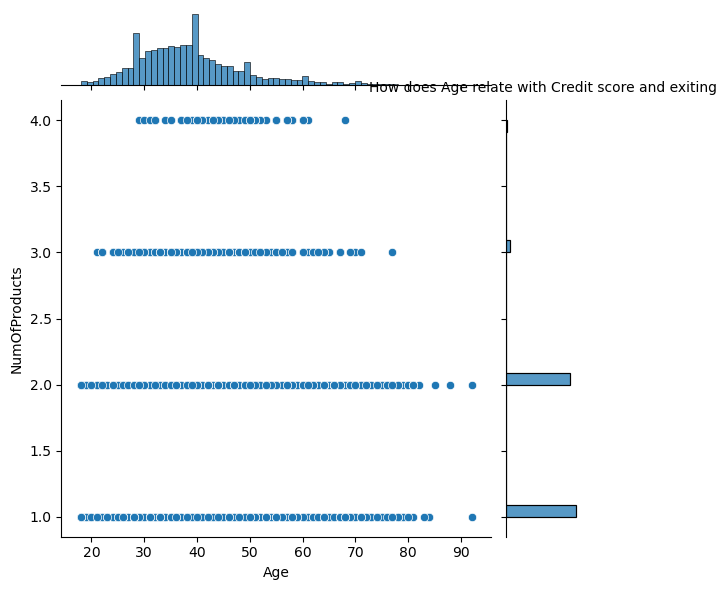

In [197]:
fig=plt.figure(figsize=(20,8))
sns.jointplot(x='Age',y='NumOfProducts',data=df)
plt.title('How does Age relate with Credit score and exiting',size=10)
plt.show()

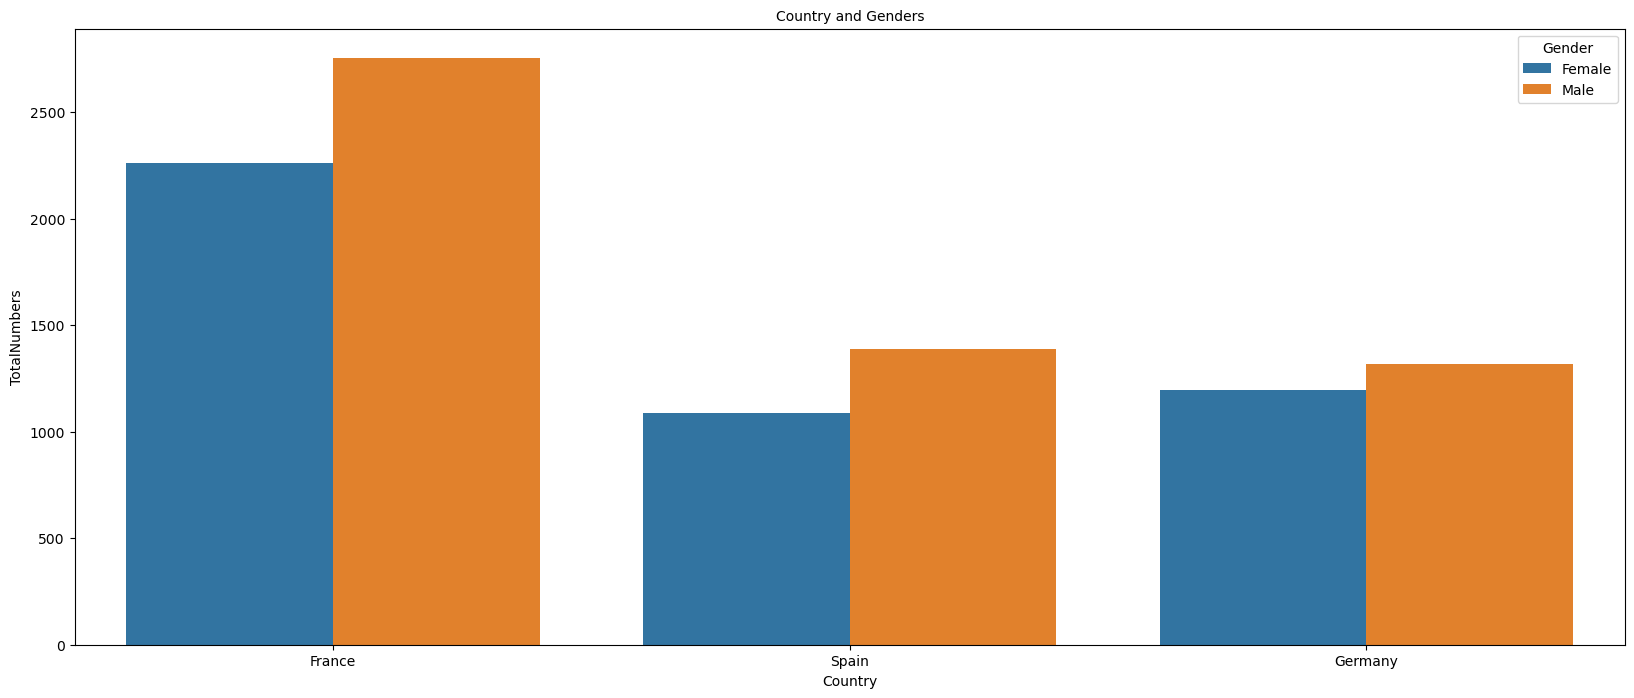

In [198]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x='Geography',hue='Gender',data=df)
plt.xlabel('Country')
plt.ylabel('TotalNumbers')
plt.title('Country and Genders',size=10)
plt.show()
# The bank has more male clients than female in all its branches ,France has the most number of females

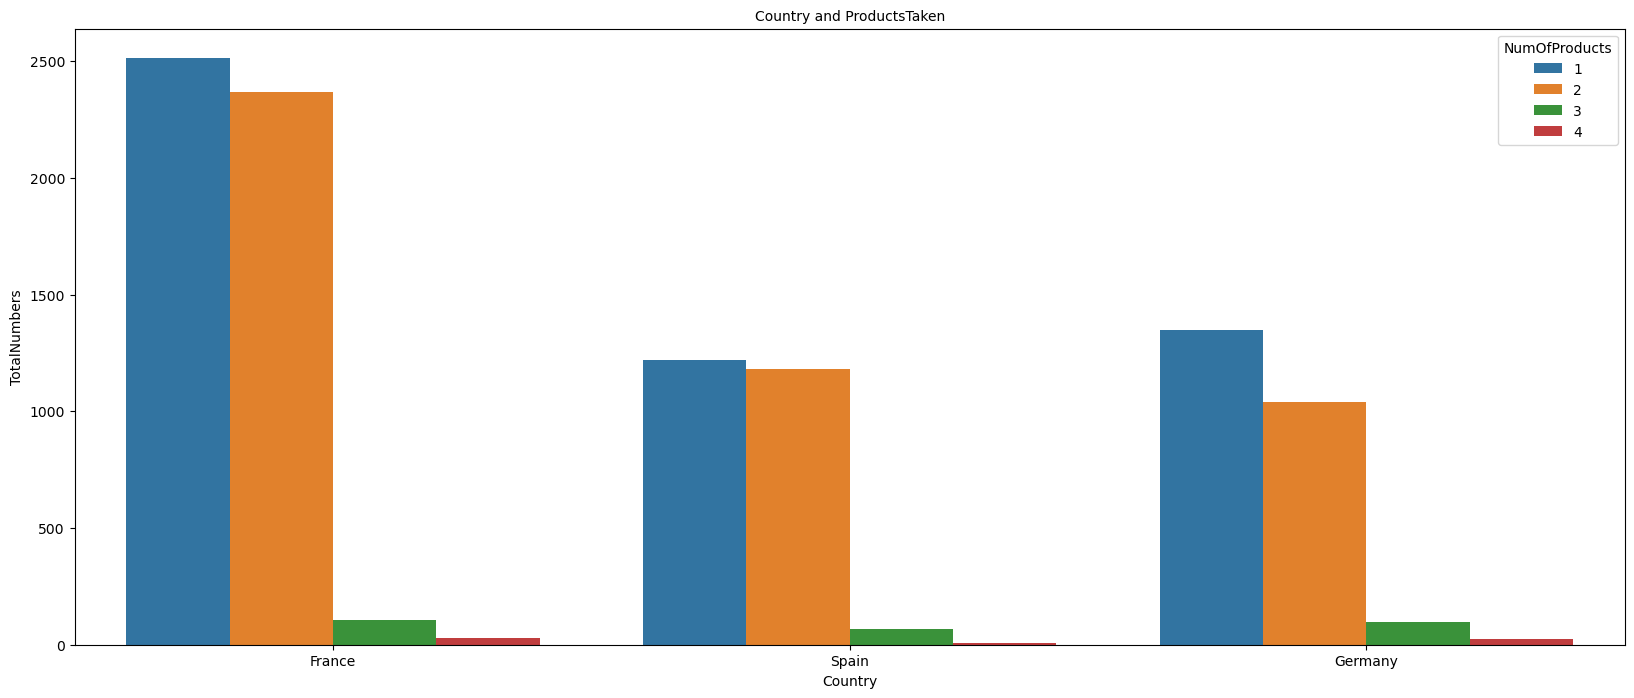

In [199]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x='Geography',hue='NumOfProducts',data=df)
plt.xlabel('Country')
plt.ylabel('TotalNumbers')
plt.title('Country and ProductsTaken',size=10)
plt.show()
# A majority of countries prefer two products . Is this Gender related though?

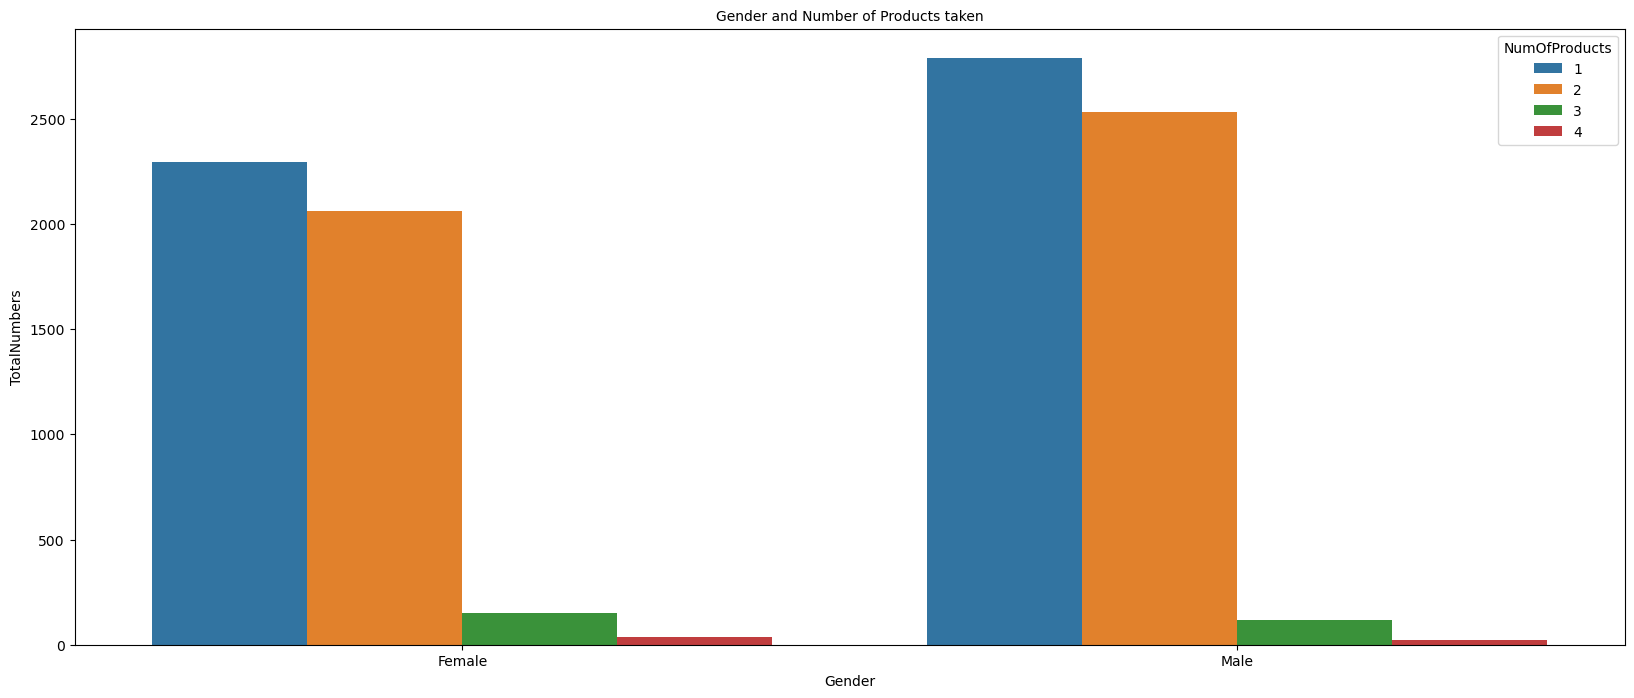

In [200]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x='Gender',hue='NumOfProducts',data=df)
plt.xlabel('Gender')
plt.ylabel('TotalNumbers')
plt.title('Gender and Number of Products taken',size=10)
plt.show()
# Both Genders have an akin preference of 1 or 2 bank products

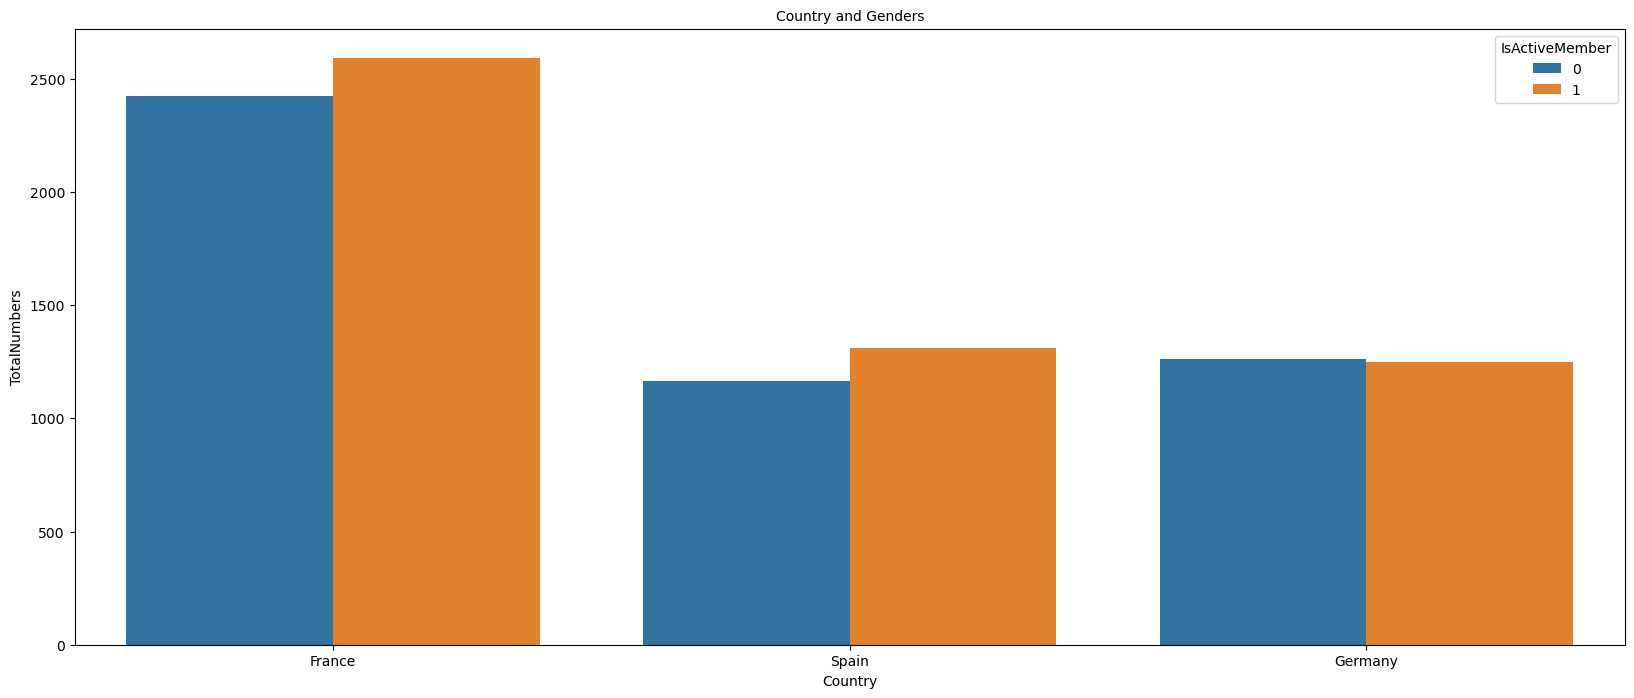

In [201]:
# Which countries have the most active members?
fig=plt.figure(figsize=(20,8))
sns.countplot(x='Geography',hue='IsActiveMember',data=df)
plt.xlabel('Country')
plt.ylabel('TotalNumbers')
plt.title('Country and Genders',size=10)
plt.show()
# France has the most active members compared to other countries . Germany has an almost even  number of active members

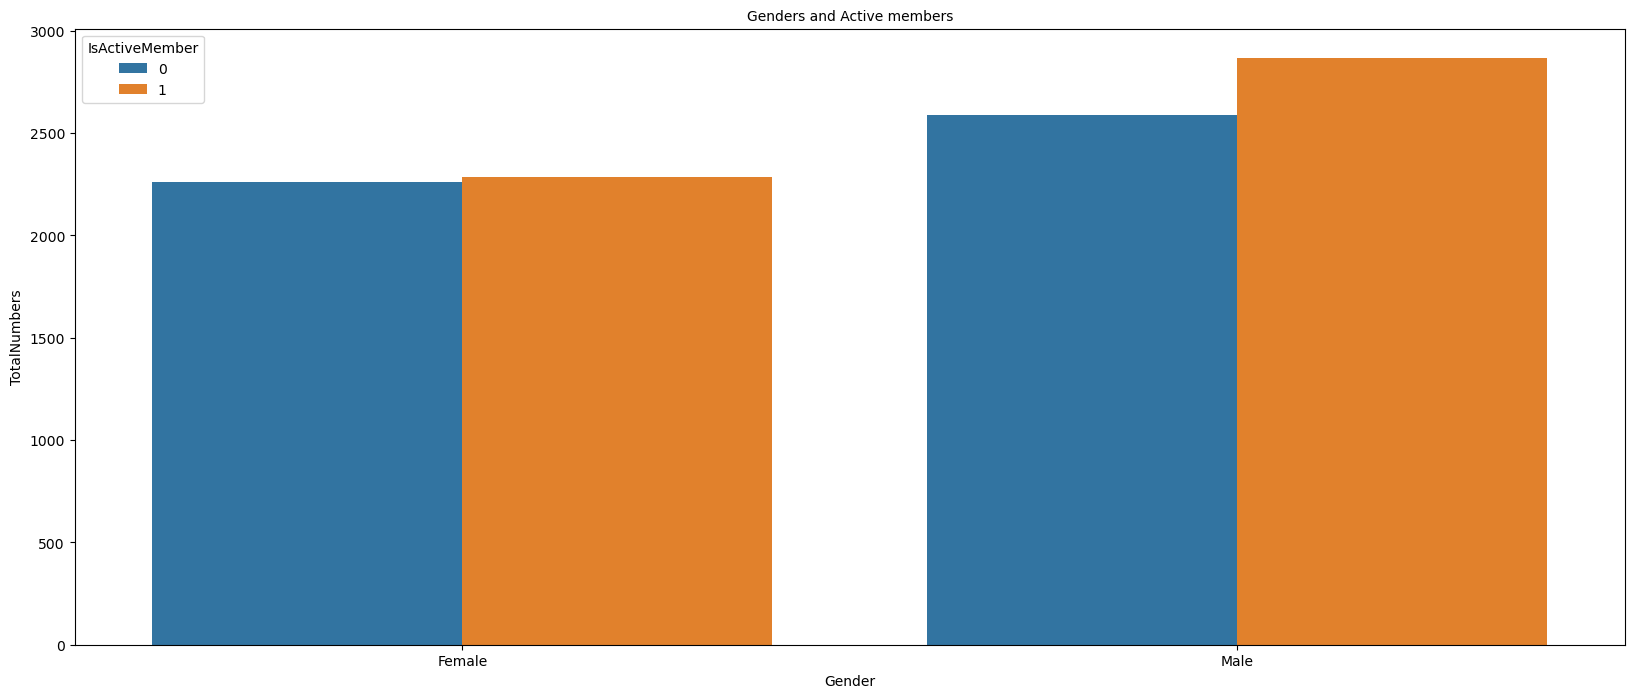

In [202]:
# Which gender has the most number of active members?
fig=plt.figure(figsize=(20,8))
sns.countplot(x='Gender',hue='IsActiveMember',data=df)
plt.xlabel('Gender')
plt.ylabel('TotalNumbers')
plt.title('Genders and Active members',size=10)
plt.show()
# In comparison to females ,males are the most active members ,partly ipso facto male are the banks main customers?

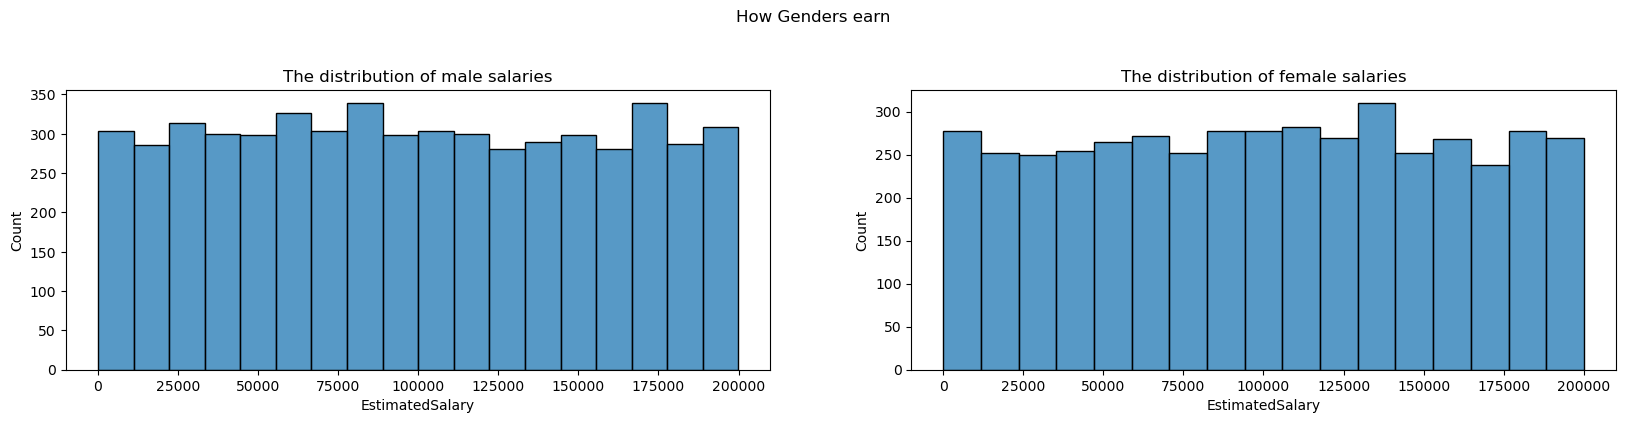

In [203]:
# Do Male have a higher salary than female?
fig = plt.figure(figsize=(20,8))
fig.suptitle('How Genders earn ')
plt.subplot(2,2,1)
sns.histplot(x=df[df['Gender']=='Male']['EstimatedSalary'])
plt.title('The distribution of male salaries')
plt.subplot(2,2,2)
sns.histplot(x=df[df['Gender']=='Female']['EstimatedSalary'])
plt.title('The distribution of female salaries')
plt.show()
# There is clear discrepancies in the gender pay gap with a majority of males earning 175000 and females 130,000

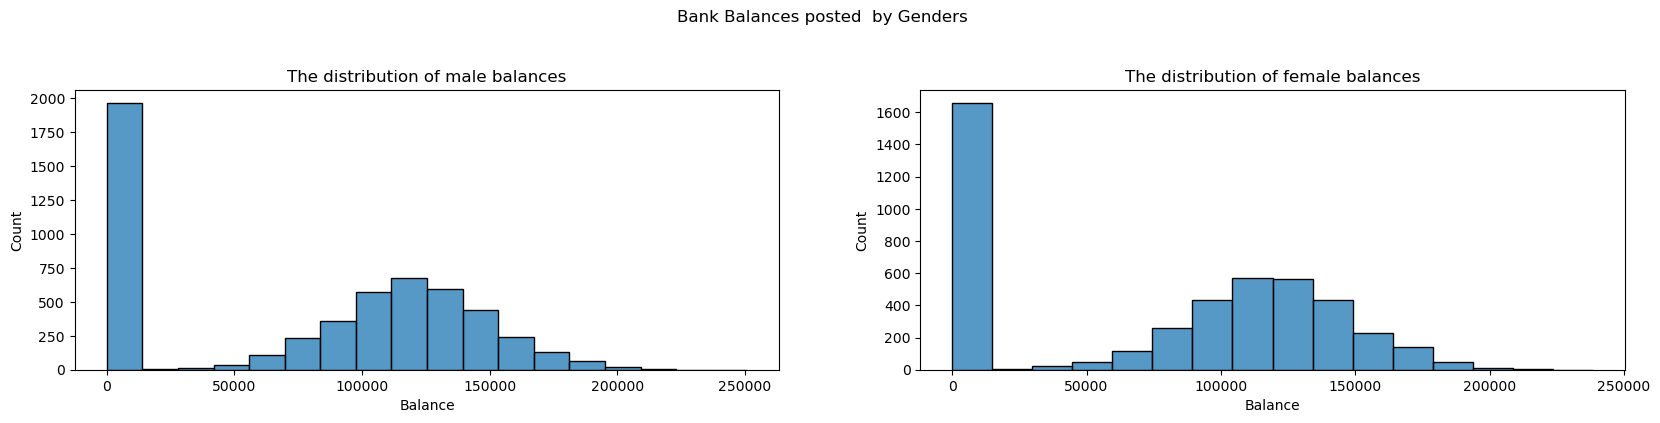

In [204]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('Bank Balances posted  by Genders ')
plt.subplot(2,2,1)
sns.histplot(x=df[df['Gender']=='Male']['Balance'])
plt.title('The distribution of male balances')
plt.subplot(2,2,2)
sns.histplot(x=df[df['Gender']=='Female']['Balance'])
plt.title('The distribution of female balances')
plt.show()

In [205]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [206]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [207]:
cat_features = ['Geography','Gender']

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
df['Gender'] = df['Gender'].replace(to_replace='Male',value=1)

In [210]:
df['Gender'] = df['Gender'].replace(to_replace='Female',value=2)

In [211]:
df['Gender'].head()

0    2
1    2
2    2
3    2
4    2
Name: Gender, dtype: int64

In [212]:
df['Geography'] = df ['Geography'].replace(to_replace='France',value=0)


In [213]:
df['Geography'] = df ['Geography'].replace(to_replace='Germany',value=1)


In [214]:
df['Geography'] = df ['Geography'].replace(to_replace='Spain',value=2)

In [215]:
df['Geography'].head()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64

In [216]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       2   42       2       0.00              1   
1          608          2       2   41       1   83807.86              1   
2          502          0       2   42       8  159660.80              3   
3          699          0       2   39       1       0.00              2   
4          850          2       2   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [217]:
df['Balance'] = np.round(df['Balance'])
df['EstimatedSalary'] = np.round(df['EstimatedSalary'])

In [218]:
df.head()

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619          0       2   42       2       0.0              1   
1          608          2       2   41       1   83808.0              1   
2          502          0       2   42       8  159661.0              3   
3          699          0       2   39       1       0.0              2   
4          850          2       2   43       2  125511.0              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         101349.0       1  
1          0               1         112543.0       0  
2          1               0         113932.0       1  
3          0               0          93827.0       0  
4          1               1          79084.0       0

# MODEL FITTING AND EVALUATION

THE  BEST MODELS HAVE TO BE  DETERMINED ,I WILL FIT AN ENSEMBLE MODEL,TREE MODEL AND LOGISTIC REGRESSOR.
GIVEN OUR GOOD NUMBER OF DATA MODELS I WILL USE DEEP LEARNING AND EVALUATE MY MODEL

# Machine Learning

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,mean_squared_error,r2_score,accuracy_score

In [220]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101,shuffle=True)

In [221]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)
print(tree_predict)
print('/n')
print(classification_report(y_test,tree_predict))
print(f"THE MEAN SQAURED ERROR IS :{mean_squared_error(y_test,tree_predict)}")
# A tree model achieved a 79% accuracy

[0 0 1 ... 0 0 0]
/n
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1577
           1       0.50      0.52      0.51       423

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.79      0.79      0.79      2000

THE MEAN SQAURED ERROR IS :0.213


In [222]:
forest= RandomForestClassifier()
forest.fit(X_train,y_train)
forest_predict = forest.predict(X_test)
print(forest_predict)
print('/n')
print(classification_report(y_test,forest_predict))
print(f"THE MEAN SQAURED ERROR IS :{mean_squared_error(y_test,forest_predict)}")
# A Random Forest  model achieved a 87% accuracy

[0 0 0 ... 0 0 1]
/n
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.76      0.51      0.61       423

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

THE MEAN SQAURED ERROR IS :0.139


In [223]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
log_predict = logistic.predict(X_test)
print(log_predict)
print('/n')
print(classification_report(y_test,log_predict))
print(f"THE MEAN SQAURED ERROR IS :{mean_squared_error(y_test,log_predict)}")
print('/n')
print(r2_score(y_test,log_predict))
# A tree model achieved a 78 % accuracy

[0 0 0 ... 0 0 0]
/n
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1577
           1       0.36      0.05      0.08       423

    accuracy                           0.78      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000

THE MEAN SQAURED ERROR IS :0.219
/n
-0.3132035420517454


In [224]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rfg_predict = rfg.predict(X_test)
print(f"THE MEAN SQAURED ERROR IS :{mean_squared_error(y_test,rfg_predict)}")
print('/n')
print(r2_score(y_test,rfg_predict))

THE MEAN SQAURED ERROR IS :0.10588885
/n
0.3650519959644477


# Deep Learning

In [225]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [226]:
X.drop(['Geography'],axis=1,inplace=True)

In [227]:
X_tensor = torch.tensor(X.values)
y_tensor = torch.tensor(y.values)

In [228]:
X_tensor.shape,y_tensor.shape

(torch.Size([10000, 9]), torch.Size([10000]))

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tensor = scaler.fit_transform(X_tensor)
y_tensor = scaler.fit_transform(y_tensor.reshape(-1,1))

In [230]:
y_tensor.shape,X_tensor.shape

((10000, 1), (10000, 9))

In [294]:
class BankChurn(nn.Module):
    def __init__(self,input_dim=9,hidden_dim=36,output_dim=2):
        super().__init__()
        self.linear_layer1 = nn.Linear(input_dim,hidden_dim)
        self.linear_layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
    def forward(self,x:torch.Tensor):
        x = self.linear_layer1(x)
        x = self.linear_layer2(x)
        x = F.relu(x)
        x = F.relu(x)
        x = self.out(x)
        x = torch.round(x)
        return x

In [295]:
model = BankChurn()

In [296]:
model.parameters

<bound method Module.parameters of BankChurn(
  (linear_layer1): Linear(in_features=9, out_features=36, bias=True)
  (linear_layer2): Linear(in_features=36, out_features=36, bias=True)
  (out): Linear(in_features=36, out_features=2, bias=True)
)>

In [297]:
X_par,X_par_test,y_par,y_par_test = train_test_split(X_tensor,y_tensor,test_size=0.2,shuffle=True)
X_par = torch.from_numpy(X_par).type(torch.Tensor)
X_par_test = torch.from_numpy(X_par_test).type(torch.Tensor)
y_par = torch.from_numpy(y_par).type(torch.Tensor)
y_par_test = torch.from_numpy(y_par_test).type(torch.Tensor)

In [298]:
with torch.inference_mode():
    dl_predictions = model.forward(X_par)
    print(predictions)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [0., 1.],
        [1., 1.],
        [1., 1.]])


In [299]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [302]:
losses= []
epochs  = 200
for epoch in range(epochs):
    y_pred = model(X_par)
    loss = criterion(y_par,y_pred)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        y_pred = model(X_par_test)
        test_loss = criterion(y_par_test,y_pred)
        if epoch% 10 == 0:
            print(f"Epoch is :{epoch},the training_loss{loss}and the test_loss is{test_loss}")
        

Epoch is :0,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :10,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :20,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :30,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :40,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :50,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :60,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :70,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :80,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :90,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :100,the training_loss0.20287500321865082and the test_loss is0.2070000022649765
Epoch is :110,the training_loss0

In [286]:
dl_predictions

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [0., 1.],
        [1., 1.],
        [1., 1.]])

# THE END : Thank You